**Gas_Turbine Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score,train_test_split

import warnings
warnings.filterwarnings('ignore')

from keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import DropoutWrapper

from keras.wrappers.scikit_learn import KerasRegressor,KerasClassifier
from sklearn.feature_selection import SelectKBest,mutual_info_regression

In [2]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [3]:
data=pd.read_csv('gas_turbines.csv')
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.isna().sum().sum()

0

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(15039, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [8]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:
data.corr()['TEY'].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

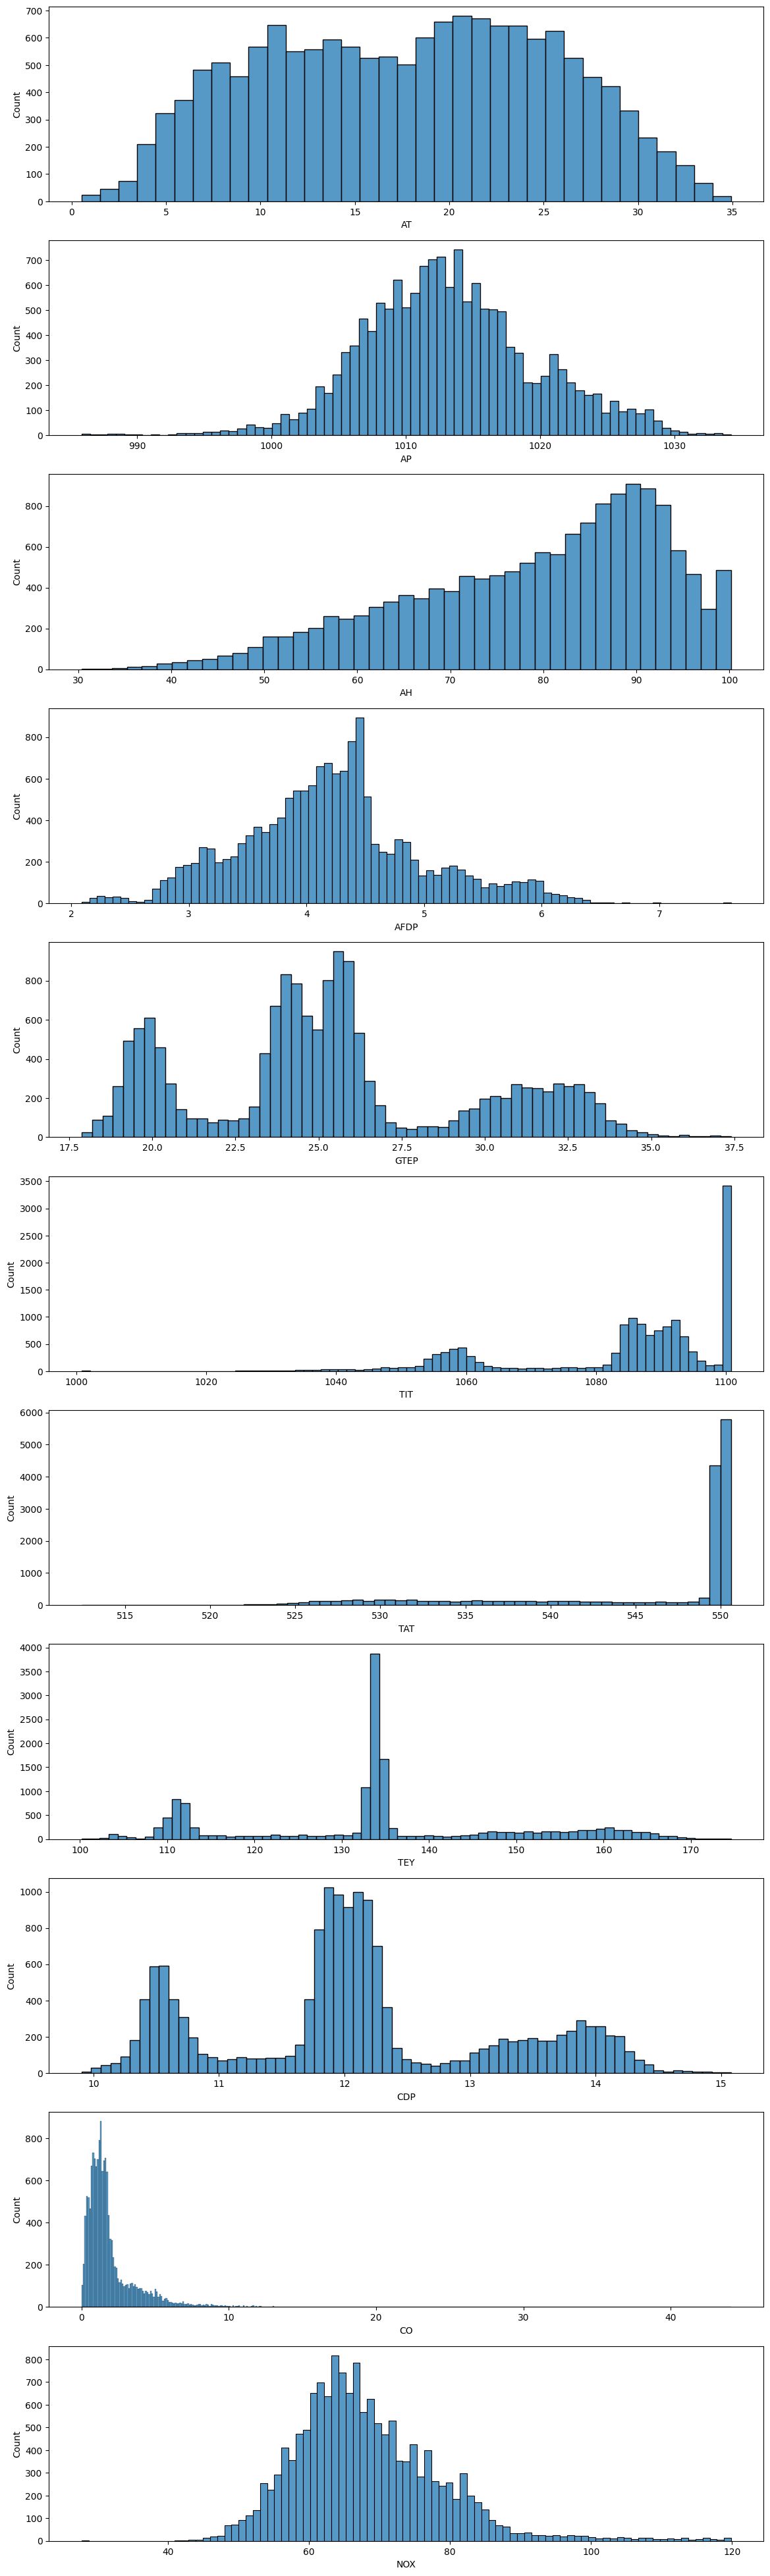

In [ ]:
fig,axes=plt.subplots(len(data.columns),1,figsize=(14,50))
i=0
for col in data.columns:
  sns.histplot(data[col],ax=axes[i])
  i=i+1

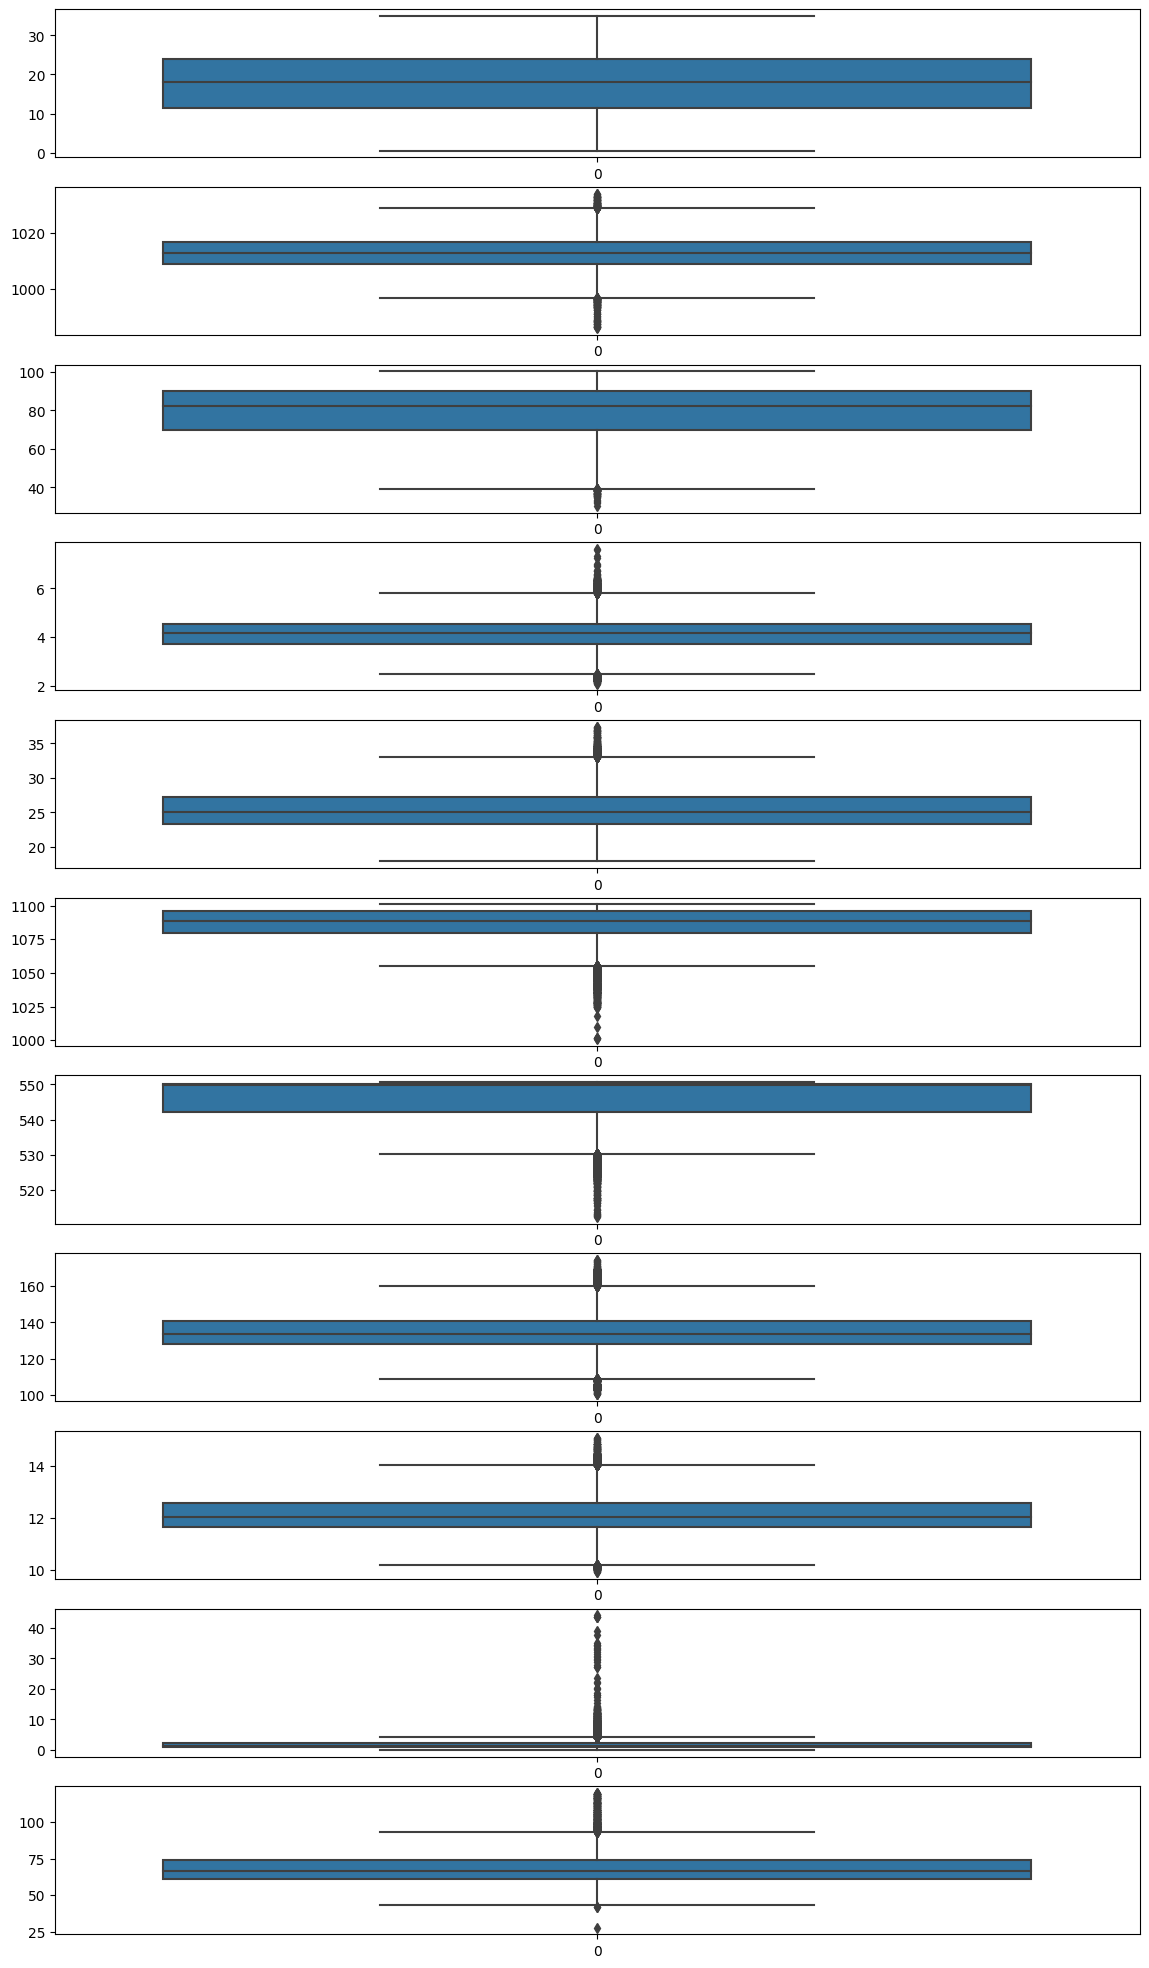

In [ ]:
fig,axes=plt.subplots(len(data.columns),1,figsize=(14,25))
i=0
for col in data.columns:
  sns.boxplot(data[col],ax=axes[i])
  i=i+1

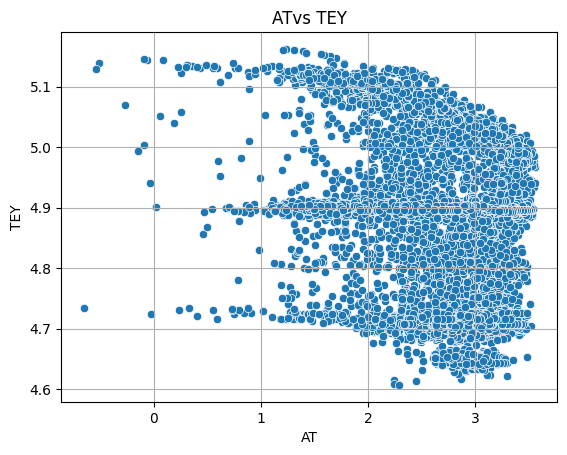

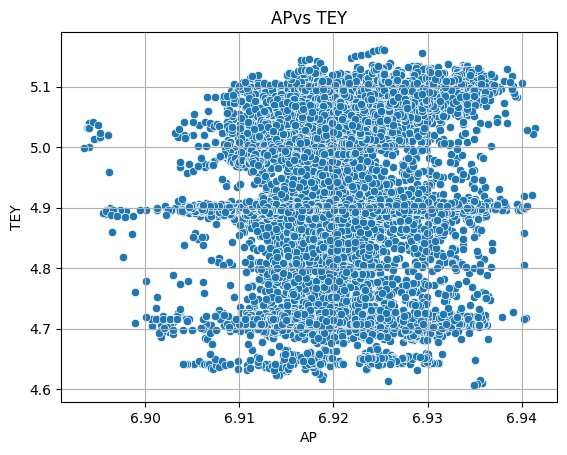

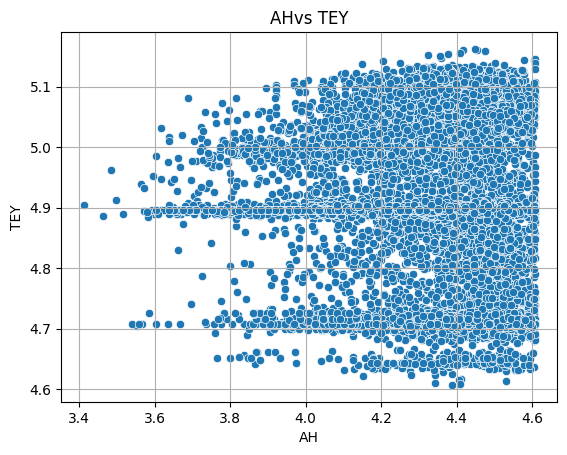

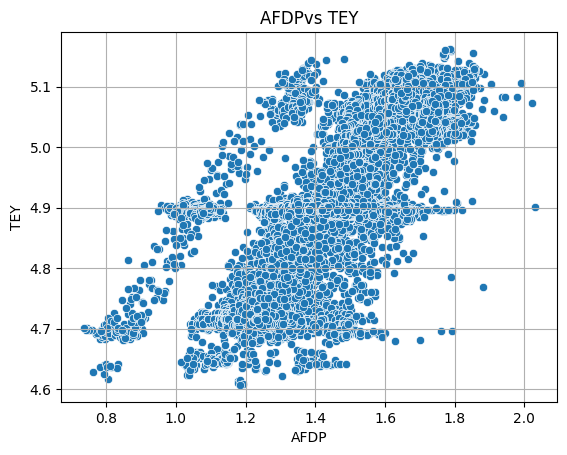

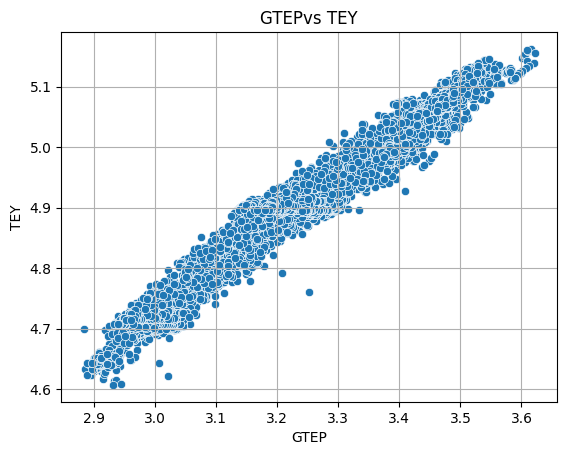

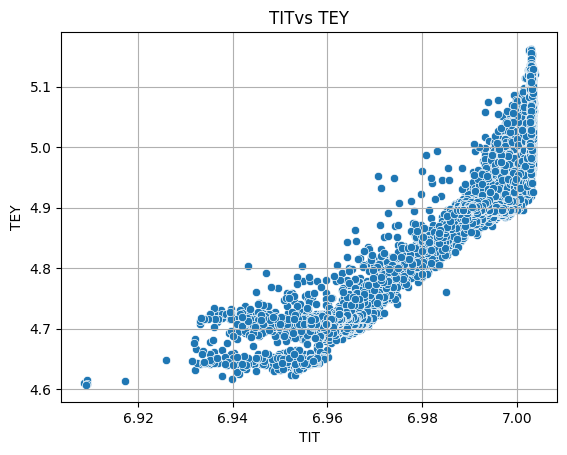

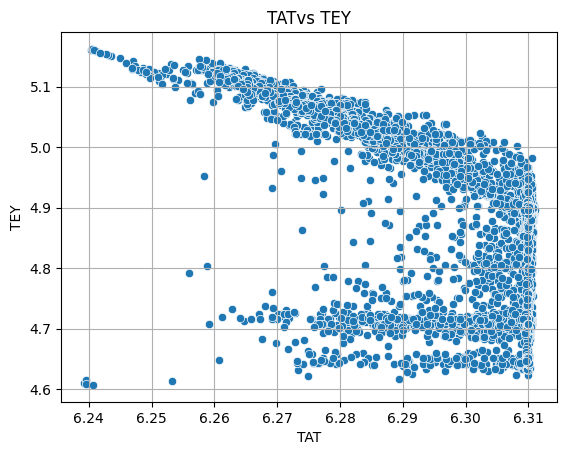

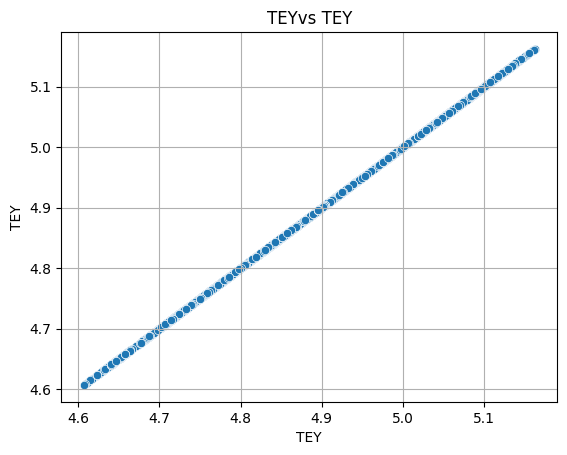

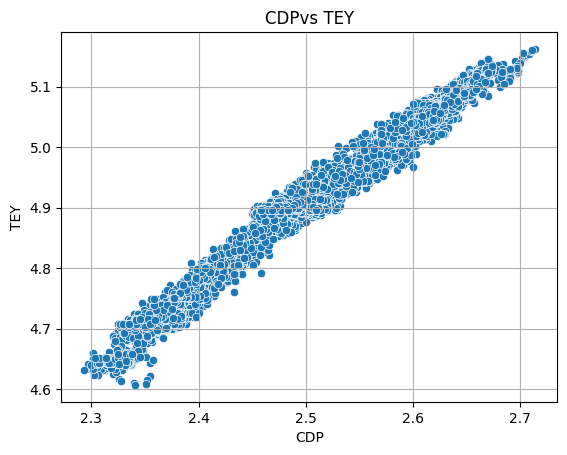

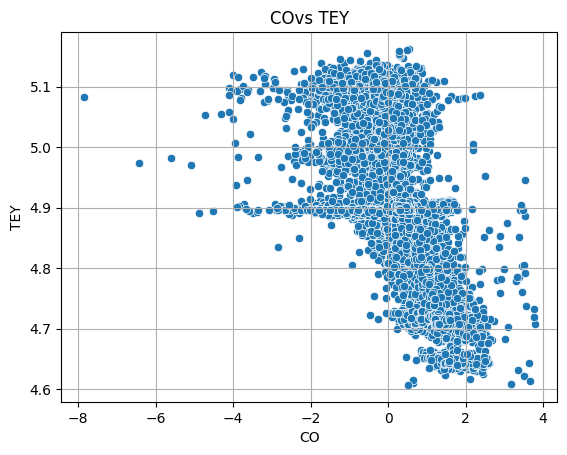

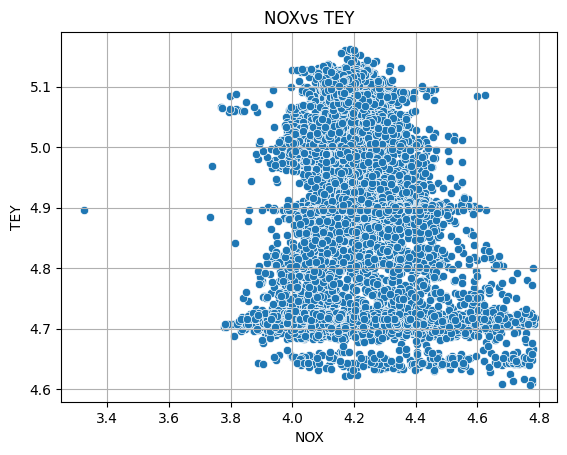

In [ ]:
i=0
for col in data.columns:
  sns.scatterplot(x=np.log(data[col]),y=np.log(data['TEY']))
  plt.title(col+ 'vs TEY')
  i=i+1
  plt.grid()
  plt.show()

In [ ]:
x=data.drop('TEY',axis=1)
y=data[['TEY']]

In [ ]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest

In [ ]:
test=SelectKBest(score_func=mutual_info_regression,k='all')
fit=test.fit(x,y)

In [ ]:
scores=fit.scores_
features=fit.transform(x)
score_df=pd.DataFrame()
score_df['Scores']=scores
score_df['Features']=x.columns

score_df.sort_values(by='Scores',ascending=False,inplace=True)
score_df

,Scores,Features
7,1.713193,CDP
4,1.599996,GTEP
5,1.323177,TIT
6,0.895950,TAT
3,0.660847,AFDP
8,0.513002,CO
0,0.412812,AT
9,0.301101,NOX
1,0.136444,AP
2,0.097683,AH


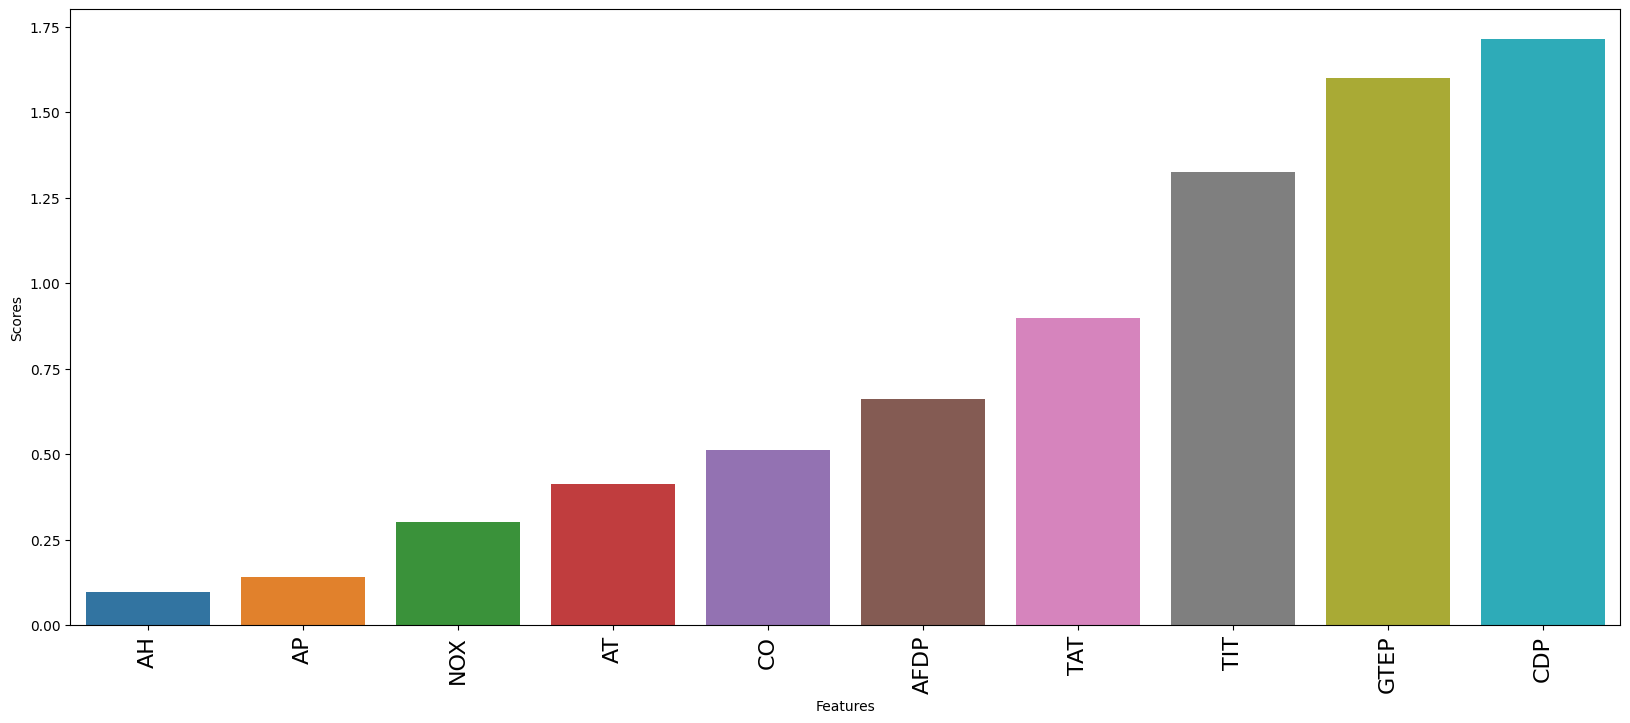

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Features',y='Scores',data=score_df,order=score_df.sort_values('Scores').Features)
plt.xticks(rotation=90,fontsize=16)
plt.show()

In [ ]:
x = x[['CDP', 'GTEP', 'TIT', 'TAT', 'AFDP', 'CO', 'AT']]
x.head() 

,CDP,GTEP,TIT,TAT,AFDP,CO,AT
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978


In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)
print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)
print('Shape of y_train:',y_train.shape)
print('Shape of y_test:',x_test.shape)

Shape of x_train: (10527, 7)
Shape of x_test: (4512, 7)
Shape of y_train: (10527, 1)
Shape of y_test: (4512, 7)


**Building model for ANN**

**Hyperparameter Tuning**



*   Batch Size
*   Epochs



In [ ]:
def create_model():

    model = Sequential()
    model.add(Dense(32,input_dim=7,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    model.add(Dense(96,kernel_initializer='uniform',activation="relu"))
    model.add(Dense(32,kernel_initializer='uniform',activation="relu"))
    model.add(Dense(64,kernel_initializer='uniform',activation="relu"))
    model.add(Dense(1,kernel_initializer='uniform',activation="linear"))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='mean_squared_error',optimizer=adam,metrics=['mean_squared_error'])
    return model

In [ ]:
model=KerasClassifier(build_fn=create_model,verbose=0)
batch_size=[10,20,30]
epochs=[10,50,100,150]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid=GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=10)
grid_result=grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  42.8s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  22.7s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  42.4s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  22.6s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ......batch_size=10, epochs=10;, score=nan total time=  22.6s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................
[CV 1/5; 2/12] END ......batch_size=10, epochs=5

In [ ]:
#Summarize the result
print('Best:{},using{}'.format(grid_result.best_score_,grid_result.best_params_))
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:nan,using{'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 10}
nan,nan with: {'batch_size': 10, 'epochs': 50}
nan,nan with: {'batch_size': 10, 'epochs': 100}
nan,nan with: {'batch_size': 10, 'epochs': 150}
nan,nan with: {'batch_size': 20, 'epochs': 10}
nan,nan with: {'batch_size': 20, 'epochs': 50}
nan,nan with: {'batch_size': 20, 'epochs': 100}
nan,nan with: {'batch_size': 20, 'epochs': 150}
nan,nan with: {'batch_size': 30, 'epochs': 10}
nan,nan with: {'batch_size': 30, 'epochs': 50}
nan,nan with: {'batch_size': 30, 'epochs': 100}
nan,nan with: {'batch_size': 30, 'epochs': 150}




*   Learning Rate
*   Dropout Rate




In [ ]:
from keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model=Sequential()
    model.add(Dense(32,input_dim=7,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mean_squared_error'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  24.1s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  42.4s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  42.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  42.1s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=nan total time=  24.0s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END d

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
nan,nan with: {'dropout_rate': 0.2, 'learning_rate': 0.1}




*   Activation Function
*   Kernel Initializer




In [ ]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim=7,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(64,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(96,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer='uniform',activation='relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mean_squared_error'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
param_grids = dict(activation_function = activation_function,init = init)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  24.7s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  27.0s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  42.7s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  42.4s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=nan total time=  24.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal.............

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'uniform'}
nan,nan with: {'activation_function': 'softmax', 'init': 'normal'}
nan,nan with: {'activation_function': 'softmax', 'init': 'zero'}
nan,nan with: {'activation_function': 'relu', 'init': 'uniform'}
nan,nan with: {'activation_function': 'relu', 'init': 'normal'}
nan,nan with: {'activation_function': 'relu', 'init': 'zero'}
nan,nan with: {'activation_function': 'tanh', 'init': 'uniform'}
nan,nan with: {'activation_function': 'tanh', 'init': 'normal'}
nan,nan with: {'activation_function': 'tanh', 'init': 'zero'}
nan,nan with: {'activation_function': 'linear', 'init': 'uniform'}
nan,nan with: {'activation_function': 'linear', 'init': 'normal'}
nan,nan with: {'activation_function': 'linear', 'init': 'zero'}




*   Number of neurons in activation layer




In [ ]:
def create_model(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(32,input_dim=7,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(64,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(96,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mean_squared_error'])
    return model

In [ ]:
model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
neuron1 = [16,24,32]
neuron2 = [16,24,32]
neuron3 = [16,24,32]
neuron4 = [16,24,32]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2,neuron3=neuron3,neuron4=neuron4)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x,y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 1/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=nan total time=  25.0s
[CV 2/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 2/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=nan total time=  42.1s
[CV 3/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 3/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=nan total time=  42.5s
[CV 4/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 4/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=nan total time=  22.9s
[CV 5/5; 1/81] START neuron1=16, neuron2=16, neuron3=16, neuron4=16.............
[CV 5/5; 1/81] END neuron1=16, neuron2=16, neuron3=16, neuron4=16;, score=nan total time=  24.0s
[CV 1/5; 2/81] START neuron1=16, neuron2=16, neu

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : nan, using {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 24}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 16, 'neuron4': 32}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 24, 'neuron4': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 24, 'neuron4': 24}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 24, 'neuron4': 32}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 32, 'neuron4': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 32, 'neuron4': 24}
nan,nan with: {'neuron1': 16, 'neuron2': 16, 'neuron3': 32, 'neuron4': 32}
nan,nan with: {'neuron1': 16, 'neuron2': 24, 'neuron3': 16, 'neuron4': 16}
nan,nan with: {'neuron1': 16, 'neuron2': 24, 'neuron3': 16, 'neuron4': 24}
nan,nan with: {'neuron1': 16, 'neuron2': 24, 'neuron3': 16, 'neuron4': 32}
nan,nan with: {'neuro

**Building model using best hyperparameter**

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim=7,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(16,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(16,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(16,kernel_initializer='uniform',activation='softmax'))
    model.add(Dropout(0.0))
    model.add(Dense(1,kernel_initializer='uniform',activation='linear'))
    
    adam = Adam(lr = 0.001) 
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mean_squared_error'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 10,epochs = 10)
model.fit(x,y)

In [ ]:
from sklearn.metrics import mean_squared_error as mse
pred=model.predict(x_test)
error=np.sqrt(mse(y_test,pred))
print('RMSE of model is:',error)

141/141 [==============================] - 0s 1ms/step
RMSE of model is: 37.465852573868915


In [ ]:
y_actual=y_test
y_predicted=pred
df=pd.DataFrame()
df['Actual']=y_actual
df['Predicted']=np.round(pred,3)
df

,Actual,Predicted
8185,164.34,100.32
8994,133.67,100.32
8944,163.41,100.32
3451,109.78,100.32
8236,135.01,100.32
...,...,...
4964,133.78,100.32
9159,137.00,100.32
12903,111.53,100.32
6025,109.77,100.32
